<a href="https://colab.research.google.com/github/Akshat-Shu/KDAG-Intra-Hackathon-2025/blob/main/KDAG_Intras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
import torch
import torch.nn as nn
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
import gdown

gdown.download_folder('https://drive.google.com/drive/folders/1UKUZZ6uTdEVdGWEKNh0ZRp08pK_AVnrm', output='Download')

Retrieving folder contents


Processing file 1wHcBG5ScNKOxQixT6XZElaYYnLe5YtTh images.hdf5
Processing file 19NhzTlMREy2ct5kaXJyuZjSrgrSq2zIOMSiiTuGCPbI metadata
Processing file 1RZTnXKRaoVzszG8zQgBgmdnGyGXL_CO3rmbf3QpDNbU Problem Statement
Processing file 1N9oQCi5zklHrv-AXRF6RBiiAzmxc4i2y subject_data.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1wHcBG5ScNKOxQixT6XZElaYYnLe5YtTh
From (redirected): https://drive.google.com/uc?id=1wHcBG5ScNKOxQixT6XZElaYYnLe5YtTh&confirm=t&uuid=cc554313-1524-464b-baea-21c29b8c7b2a
To: /content/Download/images.hdf5
100%|██████████| 1.30G/1.30G [00:18<00:00, 68.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=19NhzTlMREy2ct5kaXJyuZjSrgrSq2zIOMSiiTuGCPbI
From (redirected): https://docs.google.com/spreadsheets/d/19NhzTlMREy2ct5kaXJyuZjSrgrSq2zIOMSiiTuGCPbI/export?format=xlsx
To: /content/Download/metadata
52.7kB [00:00, 1.33MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1RZTnXKRaoVzszG8zQgBgmdnGyGXL_CO3rmbf3QpDNbU
From (redirected): https://docs.google.com/document/d/1RZTnXKRaoVzszG8zQgBgmdnGyGXL_CO3rmbf3QpDNbU/export?format=docx
To: /content/Download/Problem Statement
78.3kB [00:00, 1.43MB/s

['Download/images.hdf5',
 'Download/metadata',
 'Download/Problem Statement',
 'Download/subject_data.csv']

In [ ]:
gdown.download('https://drive.google.com/uc?id=1N9oQCi5zklHrv-AXRF6RBiiAzmxc4i2y', output='Download/subject_data.csv')

Downloading...
From (original): https://drive.google.com/uc?id=1N9oQCi5zklHrv-AXRF6RBiiAzmxc4i2y
From (redirected): https://drive.google.com/uc?id=1N9oQCi5zklHrv-AXRF6RBiiAzmxc4i2y&confirm=t&uuid=35c4c644-daf1-4c50-935b-5a2915615332
To: /content/Download/subject_data.csv
100%|██████████| 258M/258M [00:01<00:00, 141MB/s]


'Download/subject_data.csv'

In [ ]:
df = pd.read_csv('Download/subject_data.csv')
print(df)
df.columns

/tmp/ipython-input-2662961776.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Download/subject_data.csv')


             isic_id  target  patient_id  age_approx     sex  \
0       ISIC_0015670       0  IP_1235828        60.0    male   
1       ISIC_0015845       0  IP_8170065        60.0    male   
2       ISIC_0015864       0  IP_6724798        60.0    male   
3       ISIC_0015902       0  IP_4111386        65.0    male   
4       ISIC_0024200       0  IP_8313778        55.0    male   
...              ...     ...         ...         ...     ...   
401054  ISIC_9999937       0  IP_1140263        70.0    male   
401055  ISIC_9999951       0  IP_5678181        60.0    male   
401056  ISIC_9999960       0  IP_0076153        65.0  female   
401057  ISIC_9999964       0  IP_5231513        30.0  female   
401058  ISIC_9999967       0  IP_6426047        50.0    male   

       anatom_site_general  clin_size_long_diam_mm          image_type  \
0          lower extremity                    3.04  TBP tile: close-up   
1                head/neck                    1.10  TBP tile: close-up   
2        

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

In [ ]:
df.shape

(401059, 55)

In [ ]:
diagnosis_and_target = [
    'target',
    'iddx_full',
    'iddx_1',
    'iddx_2',
    'iddx_3',
    'iddx_4',
    'iddx_5',
    'mel_mitotic_index',
    'mel_thick_mm',
]

patient_info = [
    'patient_id',
    'age_approx',
    'sex',
    'anatom_site_general',
    'tbp_lv_location',
    'tbp_lv_location_simple',
]

lesion_geometry = [
    'clin_size_long_diam_mm',
    'tbp_lv_areaMM2',
    'tbp_lv_perimeterMM',
    'tbp_lv_minorAxisMM',
    'tbp_lv_eccentricity',
    'tbp_lv_area_perim_ratio',
    'tbp_lv_norm_border',
    'tbp_lv_symm_2axis',
    'tbp_lv_symm_2axis_angle',
]

lesion_color_texture = [
    'tbp_lv_A',
    'tbp_lv_Aext',
    'tbp_lv_B',
    'tbp_lv_Bext',
    'tbp_lv_C',
    'tbp_lv_Cext',
    'tbp_lv_H',
    'tbp_lv_Hext',
    'tbp_lv_L',
    'tbp_lv_Lext',
    'tbp_lv_color_std_mean',
    'tbp_lv_deltaA',
    'tbp_lv_deltaB',
    'tbp_lv_deltaL',
    'tbp_lv_deltaLBnorm',
    'tbp_lv_norm_color',
    'tbp_lv_radial_color_std_max',
    'tbp_lv_stdL',
    'tbp_lv_stdLExt',
]

other_metadata = [
    'isic_id',
    'lesion_id',
    'tbp_lv_dnn_lesion_confidence',
    'tbp_lv_nevi_confidence',
    'image_type',
    'tbp_tile_type',
    'tbp_lv_x',
    'tbp_lv_y',
    'tbp_lv_z',
]

df[patient_info]
df[other_metadata]
df[lesion_color_texture]
df[lesion_geometry]
df[diagnosis_and_target]

,target,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm
0,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
3,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
401054,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
401055,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
401056,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
401057,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len((patient_info) +
(other_metadata) +
(lesion_color_texture) +
(lesion_geometry) +
(diagnosis_and_target))

52

In [ ]:
iddx_columns = diagnosis_and_target[1:7]

for col in iddx_columns:
  print("Column:", col)
  print(df[col].value_counts())

Column: iddx_full
iddx_full
Benign                                                                                                                                                           399991
Benign::Benign melanocytic proliferations::Nevus::Nevus, Atypical, Dysplastic, or Clark                                                                             228
Benign::Benign melanocytic proliferations::Nevus                                                                                                                    141
Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Nodular                                             98
Indeterminate::Indeterminate melanocytic proliferations::Atypical melanocytic neoplasm                                                                               64
Benign::Benign epidermal proliferations::Seborrheic keratosis                                                                       

In [ ]:
df[diagnosis_and_target]

,target,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm
0,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
3,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
401054,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
401055,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
401056,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN
401057,0,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# tbp_lv_location provides much more information than any other location-based feature

print(df['tbp_lv_location'].unique())
print(df['tbp_lv_location_simple'].unique())
print(df['anatom_site_general'].unique())

['Right Leg - Upper' 'Head & Neck' 'Torso Back Top Third'
 'Torso Front Top Half' 'Right Arm - Upper' 'Left Leg - Upper'
 'Torso Front Bottom Half' 'Left Arm - Upper' 'Right Leg'
 'Torso Back Middle Third' 'Right Arm - Lower' 'Right Leg - Lower'
 'Left Leg - Lower' 'Left Arm - Lower' 'Unknown' 'Left Leg'
 'Torso Back Bottom Third' 'Left Arm' 'Right Arm' 'Torso Front'
 'Torso Back']
['Right Leg' 'Head & Neck' 'Torso Back' 'Torso Front' 'Right Arm'
 'Left Leg' 'Left Arm' 'Unknown']
['lower extremity' 'head/neck' 'posterior torso' 'anterior torso'
 'upper extremity' nan]


In [ ]:
# unuseful_columns = ['image_type', 'tbp_lv_location_simple', 'anatom_site_general', 'patient_id', 'lesion_id']

df['tbp_tile_type'].value_counts()

,count
tbp_tile_type,
3D: XP,285903
3D: white,115156


In [ ]:
df.isna().sum()

,0
isic_id,0
target,0
patient_id,0
age_approx,2798
sex,11517
anatom_site_general,5756
clin_size_long_diam_mm,0
image_type,0
tbp_tile_type,0
tbp_lv_A,0


In [ ]:
median_age = df['age_approx'].median()
df['age_approx'].fillna(median_age, inplace=True)
df['sex'].fillna('unknown', inplace=True)

/tmp/ipython-input-1618488571.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_approx'].fillna(median_age, inplace=True)
/tmp/ipython-input-1618488571.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
df['tbp_lv_x'].value_counts()

,count
tbp_lv_x,
183.481900,3
201.046100,3
178.530000,3
151.513800,3
-135.645100,3
...,...
228.228638,1
158.266541,1
162.981900,1


In [ ]:
# !pip install h5py
import h5py
images_file = 'Download/images.hdf5'


images_hdf5 = h5py.File(images_file, 'r')
img_keys = list(images_hdf5.keys())


def get_img(key):
  if key not in img_keys: return None
  img = Image.open(io.BytesIO(images_hdf5[key][()]))
  return np.array(img)

def get_img_pil(key):
  if key not in img_keys: return None
  return Image.open(io.BytesIO(images_hdf5[key][()]))


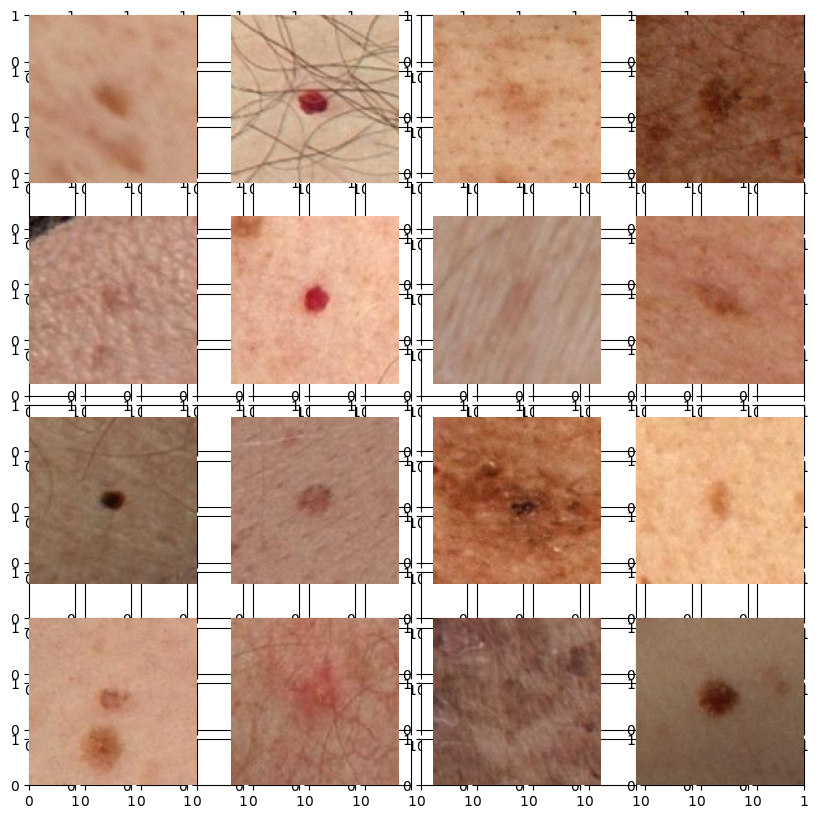

In [ ]:
plt.subplots(14, 14, figsize=(10, 10))

for i in range(4):
  for j in range(4):
    plt.subplot(4, 4, 4*i+j+1)
    plt.imshow(get_img_pil(np.random.choice(img_keys)))
    plt.axis('off')

plt.show()

In [ ]:
patient_info = [
    'patient_id',
    'age_approx',
    'sex',
    'tbp_lv_location',
]

In [ ]:
tabular_features = patient_info + lesion_geometry + lesion_color_texture

numerical_features = lesion_geometry + lesion_color_texture + ['age_approx']
categorical_features = ['sex', 'tbp_lv_location']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [ ]:
tabular_data_preprocessed = preprocessor.fit_transform(df[numerical_features+categorical_features+['isic_id']])
tabular_data_preprocessed.shape

(401059, 54)

In [ ]:
# df[['iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5']] = df['iddx_full'].str.split('::', expand=True)
iddx_columns = ['iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5']

# NO

label_encoders = {}
labels_encoded = {}
for col in iddx_columns:
    df[col].fillna('Missing', inplace=True)
    labels_encoded[col], label_encoders[col] = pd.factorize(df[col])

# image_data = np.random.rand(df.shape[0], 139, 139, 3) # Example placeholder

# X_tab_train, X_tab_val, X_img_train, X_img_val, y_train_full, y_val_full = train_test_split(
#     tabular_data_preprocessed,
#     image_data,
#     df[iddx_columns],
#     test_size=0.2,
#     random_state=42
# )

# y_train = {col: labels_encoded[col][y_train_full.index] for col in iddx_columns}
# y_val = {col: labels_encoded[col][y_val_full.index] for col in iddx_columns}

/tmp/ipython-input-2895452490.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Missing', inplace=True)
/tmp/ipython-input-2895452490.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [ ]:
!pip install hiclass

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.4 MB/s eta 0:00:00


Now that `hiclass` is installed, you can use a hierarchical classifier. For this, we need to format the labels correctly for `hiclass` and choose a classifier. We'll use a simple `BalancedRandomForestClassifier` from `hiclass` as an example, but you can explore other options in the library.

In [ ]:
X_tab_train, X_tab_val, y_train_full, y_val_full = train_test_split(
    tabular_data_preprocessed,
    df[iddx_columns],
    test_size=0.2,
    random_state=42
)

In [ ]:
X_tab_train, X_tab_val, y_train_full, y_val_full = train_test_split(
    tabular_data_preprocessed,
    df['target'],
    test_size=0.2,
    random_state=42
)

In [ ]:
y_train_full

,target
18085,0
171181,0
284095,0
354900,0
77679,0
...,...
259178,0
365838,0
131932,0
146867,0


In [ ]:
# from hiclass import LocalClassifierPerNode
# from sklearn.ensemble import RandomForestClassifier
from hiclass import LocalClassifierPerNode
import numpy as np
# Import XGBoost classifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import pandas as pd

class_counts = df['iddx_1'].value_counts()
total_samples = len(df)
class_weights = {cls: total_samples / (len(class_counts) * count) for cls, count in class_counts.items()}


sample_weights = np.array([class_weights[label] for label in y_train_full['iddx_1']])


hclf = LocalClassifierPerNode(local_classifier=LGBMClassifier(device='gpu'), n_jobs=-1, verbose=5)

KeyError: 'iddx_1'

In [ ]:
hclf.fit(X_tab_train, y_train_full, sample_weight=sample_weights)

In [ ]:
predict =hclf.predict(X_tab_val)

In [ ]:
(predict == y_val_full).sum() / len(predict)

In [ ]:
df.loc[non_benign_y_val.index]

In [ ]:
non_benign_X_val = X_tab_val[y_val_full['iddx_1'] != 'Benign']
non_benign_y_val = y_val_full[y_val_full['iddx_1'] != 'Benign']

(hclf.predict(non_benign_X_val) == non_benign_y_val).sum() / len(non_benign_X_val)

In [ ]:
import pickle

filename = 'hclf_model.pkl'

with open(filename, 'wb') as f:
    pickle.dump(hclf, f)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

def get_data_transforms():
    train_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ToTensor(), # Add ToTensor here to convert PIL Image to Tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    val_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(), # Add ToTensor here
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    return train_transforms, val_transforms

class BasicCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(BasicCNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2)  # 139 -> 34
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)  # 34 -> 16

        self.conv2 = nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2)  # 16 -> 16
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)  # 16 -> 7

        self.conv3 = nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1)  # 7 -> 7

        self.conv4 = nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1)  # 7 -> 7

        self.conv5 = nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1)  # 7 -> 7
        self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2)  # 7 -> 3

        self.bn1 = nn.BatchNorm2d(96)
        self.bn2 = nn.BatchNorm2d(256)
        self.bn3 = nn.BatchNorm2d(384)
        self.bn4 = nn.BatchNorm2d(384)
        self.bn5 = nn.BatchNorm2d(256)

        self.fc1 = nn.Linear(256 * 3 * 3, 4096)
        self.fc2 = nn.Linear(4096, 1000)
        self.fc3 = nn.Linear(1000, num_classes)

        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)

        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)

        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = F.relu(self.bn5(self.conv5(x)))
        x = self.pool3(x)

        x = x.view(x.size(0), -1)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)

        return x

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3,
                              stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3,
                              stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x

        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = F.relu(out)

        return out

class ResNet18(nn.Module):
    def __init__(self, num_classes=2):
        super(ResNet18, self).__init__()

        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)  # 139 -> 70
        self.bn1 = nn.BatchNorm2d(64)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)  # 70 -> 35

        self.layer1 = self._make_layer(64, 64, 2, stride=1)    # 35x35
        self.layer2 = self._make_layer(64, 128, 2, stride=2)   # 18x18
        self.layer3 = self._make_layer(128, 256, 2, stride=2)  # 9x9
        self.layer4 = self._make_layer(256, 512, 2, stride=2)  # 5x5

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc1 = nn.Linear(512, 4096)
        self.fc2 = nn.Linear(4096, 10000)
        self.fc3 = nn.Linear(10000, num_classes)
        self.dropout = nn.Dropout(0.5)

    def _make_layer(self, in_channels, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

        layers = []
        layers.append(BasicBlock(in_channels, out_channels, stride, downsample))

        for _ in range(1, blocks):
            layers.append(BasicBlock(out_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)

        return x

class MBConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, expand_ratio):
        super(MBConvBlock, self).__init__()
        self.stride = stride
        self.use_residual = stride == 1 and in_channels == out_channels

        expanded_channels = in_channels * expand_ratio
        self.expand_conv = nn.Conv2d(in_channels, expanded_channels, 1, bias=False) if expand_ratio != 1 else None
        self.expand_bn = nn.BatchNorm2d(expanded_channels) if expand_ratio != 1 else None

        self.depthwise_conv = nn.Conv2d(expanded_channels, expanded_channels, kernel_size,
                                       stride, padding=kernel_size//2, groups=expanded_channels, bias=False)
        self.depthwise_bn = nn.BatchNorm2d(expanded_channels)

        self.se_reduce = nn.Conv2d(expanded_channels, expanded_channels // 4, 1)
        self.se_expand = nn.Conv2d(expanded_channels // 4, expanded_channels, 1)

        self.pointwise_conv = nn.Conv2d(expanded_channels, out_channels, 1, bias=False)
        self.pointwise_bn = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        identity = x

        if self.expand_conv is not None:
            x = self.swish(self.expand_bn(self.expand_conv(x)))

        x = self.swish(self.depthwise_bn(self.depthwise_conv(x)))

        se = F.adaptive_avg_pool2d(x, 1)
        se = torch.sigmoid(self.se_expand(F.relu(self.se_reduce(se))))
        x = x * se

        x = self.pointwise_bn(self.pointwise_conv(x))

        if self.use_residual:
            x = x + identity

        return x

    def swish(self, x):
        return x * torch.sigmoid(x)

class EfficientNetB0(nn.Module):
    def __init__(self, num_classes=2):
        super(EfficientNetB0, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1, bias=False)  # 139 -> 70
        self.bn1 = nn.BatchNorm2d(32)

        self.mbconv1 = MBConvBlock(32, 16, 3, 1, 1)     # 70x70
        self.mbconv2 = MBConvBlock(16, 24, 3, 2, 6)     # 35x35
        self.mbconv3 = MBConvBlock(24, 24, 3, 1, 6)     # 35x35
        self.mbconv4 = MBConvBlock(24, 40, 5, 2, 6)     # 18x18
        self.mbconv5 = MBConvBlock(40, 40, 5, 1, 6)     # 18x18
        self.mbconv6 = MBConvBlock(40, 80, 3, 2, 6)     # 9x9
        self.mbconv7 = MBConvBlock(80, 80, 3, 1, 6)     # 9x9
        self.mbconv8 = MBConvBlock(80, 80, 3, 1, 6)     # 9x9
        self.mbconv9 = MBConvBlock(80, 112, 5, 1, 6)    # 9x9
        self.mbconv10 = MBConvBlock(112, 112, 5, 1, 6)  # 9x9
        self.mbconv11 = MBConvBlock(112, 112, 5, 1, 6)  # 9x9
        self.mbconv12 = MBConvBlock(112, 192, 5, 2, 6)  # 5x5
        self.mbconv13 = MBConvBlock(192, 192, 5, 1, 6)  # 5x5
        self.mbconv14 = MBConvBlock(192, 192, 5, 1, 6)  # 5x5
        self.mbconv15 = MBConvBlock(192, 192, 5, 1, 6)  # 5x5
        self.mbconv16 = MBConvBlock(192, 320, 3, 1, 6)  # 5x5

        self.conv2 = nn.Conv2d(320, 1280, kernel_size=1, bias=False)
        self.bn2 = nn.BatchNorm2d(1280)

        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(1280, num_classes)

    def swish(self, x):
        return x * torch.sigmoid(x)

    def forward(self, x):
        x = self.swish(self.bn1(self.conv1(x)))

        x = self.mbconv1(x)
        x = self.mbconv2(x)
        x = self.mbconv3(x)
        x = self.mbconv4(x)
        x = self.mbconv5(x)
        x = self.mbconv6(x)
        x = self.mbconv7(x)
        x = self.mbconv8(x)
        x = self.mbconv9(x)
        x = self.mbconv10(x)
        x = self.mbconv11(x)
        x = self.mbconv12(x)
        x = self.mbconv13(x)
        x = self.mbconv14(x)
        x = self.mbconv15(x)
        x = self.mbconv16(x)

        x = self.swish(self.bn2(self.conv2(x)))

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)

        return x

def train_model(model, train_loader, val_loader, num_epochs=50, learning_rate=0.001, class_weights=None):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    if class_weights is not None:
        class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
        criterion = nn.CrossEntropyLoss(weight=class_weights)
    else:
        criterion = nn.CrossEntropyLoss()

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    best_val_acc = 0.0

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        train_loader_tqdm = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]', leave=False)
        for batch_idx, (data, target) in enumerate(train_loader_tqdm):
            data, target = data.to(device), target.to(device)

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            train_total += target.size(0)
            train_correct += (predicted == target).sum().item()

            train_loader_tqdm.set_postfix({'loss': f'{train_loss/(batch_idx+1):.4f}',
                                          'acc': f'{100.*train_correct/train_total:.2f}%'})


        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            val_loader_tqdm = tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Val]', leave=False)
            for data, target in val_loader_tqdm:
                data, target = data.to(device), target.to(device)
                output = model(data)
                loss = criterion(output, target)

                val_loss += loss.item()
                _, predicted = torch.max(output.data, 1)
                val_total += target.size(0)
                val_correct += (predicted == target).sum().item()

                val_loader_tqdm.set_postfix({'loss': f'{val_loss/(val_total/val_loader.batch_size):.4f}',
                                           'acc': f'{100.*val_correct/val_total:.2f}%'})


        train_acc = 100. * train_correct / train_total
        val_acc = 100. * val_correct / val_total
        train_loss = train_loss / len(train_loader)
        val_loss = val_loss / len(val_loader)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        scheduler.step(val_loss)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'best_model.pth')

        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        print('-' * 50)

    return train_losses, val_losses, train_accuracies, val_accuracies

def evaluate_model(model, test_loader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    model.eval()

    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = torch.max(output, 1)

            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(target.cpu().numpy())

    accuracy = accuracy_score(all_targets, all_predictions)
    precision = precision_score(all_targets, all_predictions, average='binary')
    recall = recall_score(all_targets, all_predictions, average='binary')
    f1 = f1_score(all_targets, all_predictions, average='binary')

    cm = confusion_matrix(all_targets, all_predictions)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    mcc = ((tp * tn) - (fp * fn)) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

    geometric_mean = np.sqrt(recall * specificity)

    error_rate = 1 - accuracy

    print("Model Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
    print(f"Recall/Sensitivity: {recall:.4f} ({recall*100:.2f}%)")
    print(f"Specificity: {specificity:.4f} ({specificity*100:.2f}%)")
    print(f"F1-Score: {f1:.4f} ({f1*100:.2f}%)")
    print(f"Matthews Correlation Coefficient: {mcc:.4f} ({mcc*100:.2f}%)")
    print(f"Geometric Mean: {geometric_mean:.4f}")
    print(f"Error Rate: {error_rate:.4f} ({error_rate*100:.2f}%)")

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'specificity': specificity,
        'f1_score': f1,
        'mcc': mcc,
        'geometric_mean': geometric_mean,
        'error_rate': error_rate
    }

In [ ]:
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torch
import pandas as pd
import numpy as np
import io
from PIL import Image
import h5py


class MelanomaDataset(Dataset):
    def __init__(self, dataframe, get_img_function, transforms=None):
        self.dataframe = dataframe
        self.get_img = get_img_function
        self.transforms = transforms
        self.label_column = 'target'

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_id = self.dataframe.iloc[idx]['isic_id']
        image = self.get_img(img_id)

        if self.transforms:
            image = self.transforms(image)

        label = self.dataframe.iloc[idx][self.label_column]
        label_tensor = torch.tensor(label, dtype=torch.long)

        return image, label_tensor

train_indices = y_train_full.index
val_indices = y_val_full.index

df_train = df.loc[train_indices].copy().reset_index(drop=True)
df_val = df.loc[val_indices].copy().reset_index(drop=True)

train_transforms, val_transforms = get_data_transforms()

train_dataset = MelanomaDataset(df_train, get_img, transforms=train_transforms)
val_dataset = MelanomaDataset(df_val, get_img, transforms=val_transforms)

class_counts = df_train['target'].value_counts()
class_weights = 1. / class_counts
sample_weights = class_weights[df_train['target']]

sampler = WeightedRandomSampler(
    weights=sample_weights.values,
    num_samples=len(sample_weights),
    replacement=True
)

BATCH_SIZE = 128
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Train loader batch size: {train_loader.batch_size}")
print(f"Validation loader batch size: {val_loader.batch_size}")

print("\nVerifying data loader output shapes:")
for images, labels in train_loader:
    print(f"Batch images shape: {images.shape}")
    print(f"Batch labels shape: {labels.shape}")
    print(f"Batch labels dtype: {labels.dtype}")
    print(f"Batch labels (first 5 samples): {labels[:5]}")
    break

for images, labels in val_loader:
    print(f"Batch images shape: {images.shape}")
    print(f"Batch labels shape: {labels.shape}")
    print(f"Batch labels dtype: {labels.dtype}")
    print(f"Batch labels (first 5 samples): {labels[:5]}")
    break

In [ ]:
efficientnet_b0_model = EfficientNetB0(num_classes=2)

num_epochs = 10
learning_rate = 0.001

class_counts = y_train_full.value_counts()
total_samples = len(y_train_full)
class_weights = [total_samples / (2 * class_counts[0]), total_samples / (2 * class_counts[1])]
print(f"Calculated class weights: {class_weights}")

print(f"Starting training of EfficientNet-B0 for {num_epochs} epochs with class weights...")
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    efficientnet_b0_model,
    train_loader,
    val_loader,
    num_epochs=num_epochs,
    learning_rate=learning_rate,
    class_weights=class_weights
)

print("\nTraining finished.")

Vision Transformer

In [ ]:
import torch.nn as nn

class PatchEmbed(nn.Module):
    def __init__(self, img_size, patch_size, in_chans=3, embed_dim=768):
        super().__init__()
        self.img_size = img_size
        self.patch_size = patch_size
        self.in_chans = in_chans
        self.embed_dim = embed_dim
        self.num_patches = (img_size // patch_size) * (img_size // patch_size)

        self.proj = nn.Conv2d(in_chans, embed_dim, kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        B, C, H, W = x.shape
        assert H == self.img_size and W == self.img_size, \
            f"Input image size ({H}*{W}) doesn't match model ({self.img_size}*{self.img_size})."
        x = self.proj(x).flatten(2).transpose(1, 2)
        return x

class Attention(nn.Module):
    def __init__(self, dim, num_heads=8, qkv_bias=False, attn_drop=0., proj_drop=0.):
        super().__init__()
        self.num_heads = num_heads
        head_dim = dim // num_heads
        self.scale = head_dim ** -0.5

        self.qkv = nn.Linear(dim, dim * 3, bias=qkv_bias)
        self.attn_drop = nn.Dropout(attn_drop)
        self.proj = nn.Linear(dim, dim)
        self.proj_drop = nn.Dropout(proj_drop)

    def forward(self, x):
        B, N, C = x.shape
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, C // self.num_heads).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]

        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)
        attn = self.attn_drop(attn)

        x = (attn @ v).transpose(1, 2).reshape(B, N, C)
        x = self.proj(x)
        x = self.proj_drop(x)
        return x

class FeedForward(nn.Module):
    def __init__(self, in_features, hidden_features=None, out_features=None, act_layer=nn.GELU, drop=0.):
        super().__init__()
        out_features = out_features or in_features
        hidden_features = hidden_features or in_features * 4
        self.fc1 = nn.Linear(in_features, hidden_features)
        self.act = act_layer()
        self.fc2 = nn.Linear(hidden_features, out_features)
        self.drop = nn.Dropout(drop)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.drop(x)
        return x

class TransformerBlock(nn.Module):
    """Transformer block with attention and feed-forward layers."""
    def __init__(self, dim, num_heads, mlp_ratio=4., qkv_bias=False, drop=0., attn_drop=0., act_layer=nn.GELU, norm_layer=nn.LayerNorm):
        super().__init__()
        self.norm1 = norm_layer(dim)
        self.attn = Attention(dim, num_heads=num_heads, qkv_bias=qkv_bias, attn_drop=attn_drop, proj_drop=drop)
        self.norm2 = norm_layer(dim)
        mlp_hidden_dim = int(dim * mlp_ratio)
        self.mlp = FeedForward(in_features=dim, hidden_features=mlp_hidden_dim, act_layer=act_layer, drop=drop)

    def forward(self, x):
        x = x + self.attn(self.norm1(x))
        x = x + self.mlp(self.norm2(x))
        return x

class VisionTransformer(nn.Module):
    """Vision Transformer model."""
    def __init__(self, img_size=224, patch_size=16, in_chans=3, num_classes=1000, embed_dim=768, depth=12,
                 num_heads=12, mlp_ratio=4., qkv_bias=True, drop_rate=0., attn_drop_rate=0.):
        super().__init__()
        self.num_classes = num_classes
        self.embed_dim = embed_dim

        self.patch_embed = PatchEmbed(
            img_size=img_size, patch_size=patch_size, in_chans=in_chans, embed_dim=embed_dim)
        num_patches = self.patch_embed.num_patches

        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.pos_embed = nn.Parameter(torch.zeros(1, num_patches + 1, embed_dim))
        self.pos_drop = nn.Dropout(p=drop_rate)

        self.blocks = nn.ModuleList([
            TransformerBlock(
                dim=embed_dim, num_heads=num_heads, mlp_ratio=mlp_ratio, qkv_bias=qkv_bias,
                drop=drop_rate, attn_drop=attn_drop_rate)
            for i in range(depth)])
        self.norm = nn.LayerNorm(embed_dim)

        self.head = nn.Linear(embed_dim, num_classes) if num_classes > 0 else nn.Identity()

    def forward_features(self, x):
        B = x.shape[0]
        x = self.patch_embed(x)

        cls_token = self.cls_token.expand(B, -1, -1)
        x = torch.cat((cls_token, x), dim=1)
        x = self.pos_embed + x
        x = self.pos_drop(x)

        for blk in self.blocks:
            x = blk(x)

        x = self.norm(x)
        return x[:, 0] # Return the class token

    def forward(self, x):
        x = self.forward_features(x)
        x = self.head(x)
        return x

In [ ]:
print("Verifying data loader output shapes:")
for images, labels in train_loader:
    print(f"Batch images shape from train_loader: {images.shape}")
    print(f"Batch labels shape from train_loader: {labels.shape}")
    print(f"Batch labels dtype from train_loader: {labels.dtype}")
    break

for images, labels in val_loader:
    print(f"Batch images shape from val_loader: {images.shape}")
    print(f"Batch labels shape from val_loader: {labels.shape}")
    print(f"Batch labels dtype from val_loader: {labels.dtype}")
    break

**Reasoning**:
The previous code block failed because `train_loader` and `val_loader` were not defined in the current session. I need to re-execute the code cell that defines the `MelanomaDataset` and creates the dataloaders.



In [ ]:
train_indices = y_train_full.index
val_indices = y_val_full.index

df_train = df.loc[train_indices].copy().reset_index(drop=True)
df_val = df.loc[val_indices].copy().reset_index(drop=True)

train_transforms, val_transforms = get_data_transforms()

train_dataset = MelanomaDataset(df_train, get_img, transforms=train_transforms)
val_dataset = MelanomaDataset(df_val, get_img, transforms=val_transforms)

class_counts = df_train['target'].value_counts()
class_weights = 1. / class_counts
sample_weights = class_weights[df_train['target']]

sampler = WeightedRandomSampler(
    weights=sample_weights.values,
    num_samples=len(sample_weights),
    replacement=True
)

BATCH_SIZE = 1024
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Train loader batch size: {train_loader.batch_size}")
print(f"Validation loader batch size: {val_loader.batch_size}")

print("\nVerifying data loader output shapes:")
for images, labels in train_loader:
    print(f"Batch images shape: {images.shape}")
    print(f"Batch labels shape: {labels.shape}")
    print(f"Batch labels dtype: {labels.dtype}")
    print(f"Batch labels (first 5 samples): {labels[:5]}")
    break

for images, labels in val_loader:
    print(f"Batch images shape: {images.shape}")
    print(f"Batch labels shape: {labels.shape}")
    print(f"Batch labels dtype: {labels.dtype}")
    print(f"Batch labels (first 5 samples): {labels[:5]}")
    break

In [ ]:
import torchvision.models as models

vit_model = models.vit_b_16(weights='IMAGENET1K_V1')

num_ftrs = vit_model.heads.head.in_features
vit_model.heads.head = nn.Linear(num_ftrs, 2)

for name, param in vit_model.named_parameters():
    if 'heads.head' not in name:
        param.requires_grad = False

num_epochs = 10
learning_rate = 0.001

class_counts = y_train_full.value_counts()
total_samples = len(y_train_full)
class_weights_list = [total_samples / (2 * class_counts[0]), total_samples / (2 * class_counts[1])]
print(f"Calculated class weights for training: {class_weights_list}")

print(f"Starting training of Vision Transformer (classifier head only) for {num_epochs} epochs with class weights...")
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    vit_model,
    train_loader,
    val_loader,
    num_epochs=num_epochs,
    learning_rate=learning_rate,
    class_weights=class_weights_list
)

print("\nTraining finished.")

This helps make it go brr fast because we dont have to load it everytime from hdf5

In [ ]:
import os
from PIL import Image
import io
import h5py
from tqdm.auto import tqdm

output_dir = 'Images'
os.makedirs(output_dir, exist_ok=True)

print(f"Extracting images from {images_file} to {output_dir}...")

for img_id in tqdm(img_keys, desc="Extracting Images"):
    try:
        img_data = images_hdf5[img_id][()]
        img = Image.open(io.BytesIO(img_data))
        img_path = os.path.join(output_dir, f"{img_id}.jpg")
        img.save(img_path)
    except Exception as e:
        print(f"Error extracting image {img_id}: {e}")

print("Image extraction complete.")

images_hdf5.close()

In [ ]:
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torch
import pandas as pd
import numpy as np
import os
from PIL import Image
from scipy.sparse import issparse

class MelanomaDataset(Dataset):
    def __init__(self, dataframe, image_dir, tabular_data, transforms=None):

        self.dataframe = dataframe
        self.image_dir = image_dir
        if issparse(tabular_data):
            self.tabular_data = torch.tensor(tabular_data.todense(), dtype=torch.float)
        else:
            if isinstance(tabular_data, pd.DataFrame):
                 tabular_data = tabular_data.values
            self.tabular_data = torch.tensor(tabular_data, dtype=torch.float)
        self.transforms = transforms
        self.label_column = 'target'

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_id = self.dataframe.iloc[idx]['isic_id']
        img_path = os.path.join(self.image_dir, f"{img_id}.jpg")

        try:
            image = Image.open(img_path).convert('RGB')

            if self.transforms:
                image = self.transforms(image)
        except FileNotFoundError:
             print(f"Warning: Image file not found for ISIC ID {img_id}. Skipping.")
             return None, None, None

        tabular_features = self.tabular_data[idx]

        label = self.dataframe.iloc[idx][self.label_column]
        label_tensor = torch.tensor(label, dtype=torch.long)


        return image, tabular_features, label_tensor

train_indices = y_train_full.index
val_indices = y_val_full.index

df_train = df.loc[train_indices].copy().reset_index(drop=True)
df_val = df.loc[val_indices].copy().reset_index(drop=True)

X_train_tab = df_train[numerical_features + categorical_features]
X_val_tab = df_val[numerical_features + categorical_features]

X_tab_train_preprocessed_filtered = tabular_preprocessor.transform(X_train_tab)
X_tab_val_preprocessed_filtered = tabular_preprocessor.transform(X_val_tab)


train_transforms, val_transforms = get_data_transforms()

extracted_image_dir = 'Images'

train_dataset = MelanomaDataset(df_train, extracted_image_dir, X_tab_train_preprocessed_filtered, transforms=train_transforms)
val_dataset = MelanomaDataset(df_val, extracted_image_dir, X_tab_val_preprocessed_filtered, transforms=val_transforms)


class_counts = df_train['target'].value_counts()
class_weights = 1. / class_counts
sample_weights = class_weights[df_train['target']]

sampler = WeightedRandomSampler(
    weights=sample_weights.values,
    num_samples=len(sample_weights),
    replacement=True
)

BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Train loader batch size: {train_loader.batch_size}")
print(f"Validation loader batch size: {val_loader.batch_size}")


# Verify by iterating through a batch
print("\nVerifying data loader output shapes:")
for images, tabular_features, labels in train_loader:
    print(f"Batch images shape: {images.shape}")
    print(f"Batch tabular features shape: {tabular_features.shape}")
    print(f"Batch labels shape: {labels.shape}")
    print(f"Batch labels dtype: {labels.dtype}")
    print(f"Batch labels (first 5 samples): {labels[:5]}")
    break

for images, tabular_features, labels in val_loader:
    print(f"Batch images shape: {images.shape}")
    print(f"Batch tabular features shape: {tabular_features.shape}")
    print(f"Batch labels shape: {labels.shape}")
    print(f"Batch labels dtype: {labels.dtype}")
    print(f"Batch labels (first 5 samples): {labels[:5]}")
    break

In [ ]:
df_train

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch

def imshow(img):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)

    img = img * std + mean

    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

dataiter = iter(train_loader)
images, labels, id = next(dataiter)

print('Labels:', labels[:4])
imshow(torchvision.utils.make_grid(images[:4]))
print(id)

In [ ]:
df_malignant = df[df['target'] == 1]

for idx, row in df_malignant.iterrows():
    img_id = row['isic_id']
    img_path = os.path.join(extracted_image_dir, f"{img_id}.jpg")
    img = Image.open(img_path).convert('RGB')
    print(img_id)
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
useless_samples = [
    "ISIC_0096034",
    "ISIC_0190307",
    "ISIC_0238218",
    "ISIC_0287900",
    "ISIC_0528190",
    "ISIC_0699524",
    "ISIC_0968965",
    "ISIC_1105887",
    "ISIC_1141528", # maybe not
    "ISIC_1164461",
    "ISIC_1640109",
    "ISIC_1705108",
    "ISIC_1792562",
    "ISIC_2235682",
    "ISIC_2346081",
    "ISIC_2538516",
    "ISIC_2581432",
    "ISIC_2604412", # maybe not
    "ISIC_3091180",
    "ISIC_3201295",
    "ISIC_3445540",
    "ISIC_3646371",
    "ISIC_3832733",
    "ISIC_3964079",
    "ISIC_4659886",
    "ISIC_4882116",
    "ISIC_5043386",
    "ISIC_5068210",
    "ISIC_5762031",
    "ISIC_6465391",
    "ISIC_7188117",
    "ISIC_7606683",
    "ISIC_7836717",
    "ISIC_8333431",
    "ISIC_8569576",
    "ISIC_8832909",
    "ISIC_9735344"
]

from PIL import Image
plt.figure(figsize=(16, 10))

for i, img in enumerate(useless_samples):
  plt.subplot(5, 8, i + 1)
  plt.axis('off')
  plt.imshow(Image.open(os.path.join("Images", f"{img}.jpg")))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

tabular_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

tabular_data_preprocessed = tabular_preprocessor.fit_transform(df[numerical_features + categorical_features])

print(tabular_data_preprocessed.shape)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

def train_model(model, train_loader, val_loader, num_epochs=50, learning_rate=0.001, class_weights=None):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    if class_weights is not None:
        class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
        criterion = nn.CrossEntropyLoss(weight=class_weights)
    else:
        criterion = nn.CrossEntropyLoss()

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    best_val_acc = 0.0

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        train_loader_tqdm = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]', leave=False)
        for batch_idx, (images, tabular_features, labels) in enumerate(train_loader_tqdm):
            images, tabular_features, labels = images.to(device), tabular_features.to(device), labels.to(device)

            optimizer.zero_grad()
            output = model(images, tabular_features)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

            train_loader_tqdm.set_postfix({'loss': f'{train_loss/(batch_idx+1):.4f}',
                                          'acc': f'{100.*train_correct/train_total:.2f}%'})


        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            val_loader_tqdm = tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Val]', leave=False)
            for images, tabular_features, labels in val_loader_tqdm:
                images, tabular_features, labels = images.to(device), tabular_features.to(device), labels.to(device)
                output = model(images, tabular_features)
                loss = criterion(output, labels)

                val_loss += loss.item()
                _, predicted = torch.max(output.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

                val_loader_tqdm.set_postfix({'loss': f'{val_loss/(val_total/val_loader.batch_size):.4f}',
                                           'acc': f'{100.*val_correct/val_total:.2f}%'})


        train_acc = 100. * train_correct / train_total
        val_acc = 100. * val_correct / val_total
        train_loss = train_loss / len(train_loader)
        val_loss = val_loss / len(val_loader)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        scheduler.step(val_loss)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'best_hybrid_model.pth') # Save best hybrid model

        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        print('-' * 50)

    return train_losses, val_losses, train_accuracies, val_accuracies

def evaluate_model(model, test_loader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    model.eval()

    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for images, tabular_features, labels in test_loader:
            images, tabular_features, labels = images.to(device), tabular_features.to(device), labels.to(device)
            output = model(images, tabular_features)
            _, predicted = torch.max(output, 1)

            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_targets, all_predictions)
    precision = precision_score(all_targets, all_predictions, average='binary')
    recall = recall_score(all_targets, all_predictions, average='binary')  # Sensitivity
    f1 = f1_score(all_targets, all_predictions, average='binary')

    cm = confusion_matrix(all_targets, all_predictions)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    mcc = ((tp * tn) - (fp * fn)) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

    geometric_mean = np.sqrt(recall * specificity)

    error_rate = 1 - accuracy

    print("Hybrid Model Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
    print(f"Recall/Sensitivity: {recall:.4f} ({recall*100:.2f}%)")
    print(f"Specificity: {specificity:.4f} ({specificity*100:.2f}%)")
    print(f"F1-Score: {f1:.4f} ({f1*100:.2f}%)")
    print(f"Matthews Correlation Coefficient: {mcc:.4f} ({mcc*100:.2f}%)")
    print(f"Geometric Mean: {geometric_mean:.4f}")
    print(f"Error Rate: {error_rate:.4f} ({error_rate*100:.2f}%)")

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'specificity': specificity,
        'f1_score': f1,
        'mcc': mcc,
        'geometric_mean': geometric_mean,
        'error_rate': error_rate
    }

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

class HybridModel(nn.Module):
    def __init__(self, num_tabular_features, num_classes=2):
        super().__init__()

        self.vit = models.vit_b_16(weights='IMAGENET1K_V1')

        self.vit.heads.head = nn.Identity()
        vit_output_dim = 768

        tabular_hidden_dim 128
        self.tabular_fc1 = nn.Linear(num_tabular_features, tabular_hidden_dim)
        self.tabular_relu = nn.ReLU()
        self.tabular_dropout = nn.Dropout(0.5)
        self.tabular_fc2 = nn.Linear(tabular_hidden_dim, tabular_hidden_dim)
        self.tabular_relu2 = nn.ReLU()
        self.tabular_dropout2 = nn.Dropout(0.5)
        tabular_output_dim = tabular_hidden_dim

        final_fc_input_dim = vit_output_dim + tabular_output_dim
        self.final_classifier = nn.Linear(final_fc_input_dim, num_classes)

    def forward(self, image_data, tabular_data):
        image_features = self.vit(image_data)

        tabular_features = self.tabular_fc1(tabular_data)
        tabular_features = self.tabular_relu(tabular_features)
        tabular_features = self.tabular_dropout(tabular_features)
        tabular_features = self.tabular_fc2(tabular_features)
        tabular_features = self.tabular_relu2(tabular_features)
        tabular_features = self.tabular_dropout2(tabular_features)


        combined_features = torch.cat((image_features, tabular_features), dim=1)

        logits = self.final_classifier(combined_features)

        return logits

num_tabular_features = X_tab_train_preprocessed_filtered.shape[1]

num_epochs = 10
learning_rate = 0.001

class_counts = df_train['target'].value_counts()
total_samples = len(df_train)
class_weights_list = [total_samples / (2 * class_counts[0]), total_samples / (2 * class_counts[1])]
print(f"Calculated class weights for training the hybrid model: {class_weights_list}")

print(f"\nStarting training of the Hybrid Model for {num_epochs} epochs with class weights...")
hybrid_train_losses, hybrid_val_losses, hybrid_train_accuracies, hybrid_val_accuracies = train_model(
    hybrid_model,
    train_loader,
    val_loader,
    num_epochs=num_epochs,
    learning_rate=learning_rate,
    class_weights=class_weights_list
)

print("\nHybrid Model Training finished.")

print("\nEvaluating the trained Hybrid Model...")
hybrid_evaluation_metrics = evaluate_model(hybrid_model, val_loader)

print("\nHybrid Model Evaluation complete.")

In [ ]:
torch.save(hybrid_model.state_dict(), 'hybrid_model.pth')